In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Product_Reviews.csv to Product_Reviews (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Product_Reviews.csv')
df.head()


,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE


In [ ]:
df.rename(columns={'Product Review': 'review', 'Sentiment': 'sentiment'}, inplace=True)


In [ ]:
df.isnull().sum()


,0
Product ID,0
review,0
sentiment,0


In [ ]:
df.dropna(subset=['review', 'sentiment'], inplace=True)


In [ ]:
df['sentiment'].value_counts()


,count
sentiment,
POSITIVE,852
NEUTRAL,81
NEGATIVE,74


In [ ]:
import re

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove special chars and numbers
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...
1,Allow me to preface this with a little history...,allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...
4,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...


In [ ]:
df.drop_duplicates(subset='cleaned_review', inplace=True)


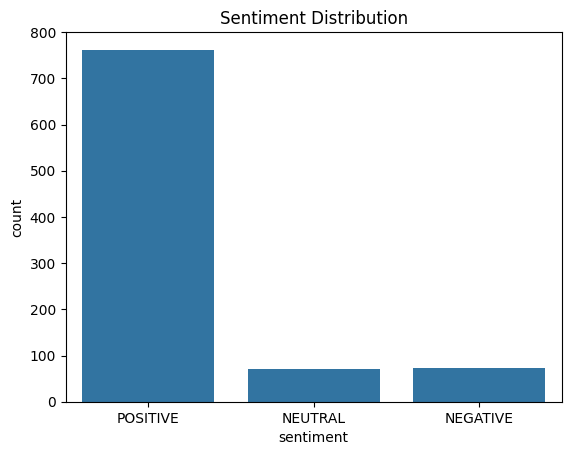

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()


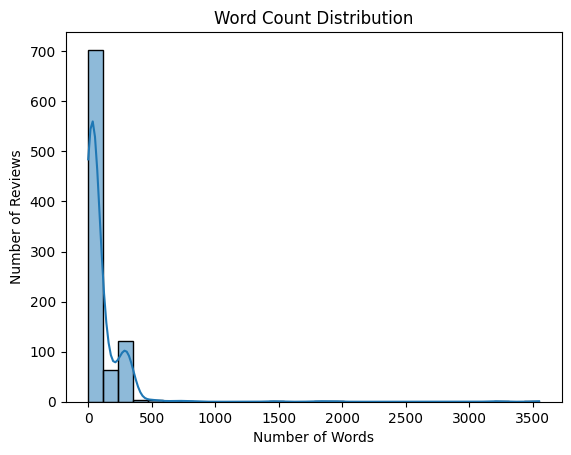

In [ ]:
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))

sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['processed_review'] = df['review'].apply(preprocess_text)
df[['review', 'processed_review']].head()


,review,processed_review
0,I initially had trouble deciding between the p...,initi troubl decid paperwhit voyag review less...
1,Allow me to preface this with a little history...,allow prefac littl histori casual reader own n...
2,I am enjoying it so far. Great for reading. Ha...,enjoy far great read origin fire sinc fire use...
3,I bought one of the first Paperwhites and have...,bought one first paperwhit pleas constant comp...
4,I have to say upfront - I don't like coroporat...,say upfront dont like coropor hermet close stu...


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()  # 1. Lowercasing
    text = re.sub(r'[^a-z\s]', '', text)  # 2. Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # 3. Remove extra whitespaces
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # 4 & 5. Stopword removal + stemming
    return ' '.join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['processed_review'] = df['review'].apply(clean_text)
df[['review', 'processed_review']].head()


,review,processed_review
0,I initially had trouble deciding between the p...,initi troubl decid paperwhit voyag review less...
1,Allow me to preface this with a little history...,allow prefac littl histori casual reader own n...
2,I am enjoying it so far. Great for reading. Ha...,enjoy far great read origin fire sinc fire use...
3,I bought one of the first Paperwhites and have...,bought one first paperwhit pleas constant comp...
4,I have to say upfront - I don't like coroporat...,say upfront dont like coropor hermet close stu...


In [ ]:
print("Original Review:\n", df['review'].iloc[0])
print("\nCleaned Review:\n", df['processed_review'].iloc[0])


Original Review:
 I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['processed_review'])


In [ ]:
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.head()


,aa,abc,abil,abilitieswhen,abit,abl,aboutconclusionif,abovement,absolut,absorb,...,youread,youth,youtub,youv,yr,zen,zero,zink,zippi,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
import pandas as pd

df = pd.read_csv('Product_Reviews.csv')  # ← Make sure this matches your uploaded file
df.head()  # See first few rows


,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE


In [ ]:
print(df.columns)


Index(['Product ID', 'Product Review', 'Sentiment'], dtype='object')


In [ ]:
import re

def clean_text(text):
    text = text.lower()                              # Lowercase
    text = re.sub(r'\d+', '', text)                  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)              # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()         # Remove extra spaces
    return text

df['cleaned_text'] = df['Product Review'].astype(str).apply(clean_text)


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['final_cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

ngram = CountVectorizer(ngram_range=(2, 3))  # bigrams and trigrams
data_features_ngram = ngram.fit_transform(df['final_cleaned_text'])


In [ ]:
features_df = pd.DataFrame(data_features_ngram.toarray(), columns=ngram.get_feature_names_out())
features_df.head()


,aa batteries,aa batteries duracell,aa batteries ive,abc live,abc live tv,abilitieswhen amd,abilitieswhen amd created,ability check,ability check email,ability connect,...,zen type,zen type apps,zero eye,zero eye strain,zink happy,zink happy appmy,zippy awesome,zippy awesome display,zoom work,zoom work great
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Load your dataset
df = pd.read_csv('Product_Reviews.csv')  # 👈 Make sure this file is in the same folder

# Step 2: Clean and prepare the text
df['final_cleaned_text'] = df['Product Review'].astype(str).str.lower()

# Step 3: Define vectorizers
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # unigrams + bigrams

# Step 4: Apply vectorizers to text
df_BOW = bow_vectorizer.fit_transform(df['final_cleaned_text'])
df_tfidf = tfidf_vectorizer.fit_transform(df['final_cleaned_text'])
df_ngram = ngram_vectorizer.fit_transform(df['final_cleaned_text'])

# Step 5: Feature sets and target
vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]

y = df['Sentiment']

# Step 6: Train and evaluate model for each vectorizer
for name, X in vectorized_datasets:
    print(f"\n🔍 Using vectorization: {name}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)




🔍 Using vectorization: BoW

🔍 Using vectorization: TF-IDF

🔍 Using vectorization: N-gram
